In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
os.chdir("/capstor/scratch/cscs/ajayaraj/qtpyt-tests/strained_CNT/toy_models/substrate/")

In [2]:
H, S = np.load("dft/output/no_lowdin/hs_los_no_lowdin.npy")
index_active_region = np.load("dft/output/no_lowdin/index_active_region.npy")

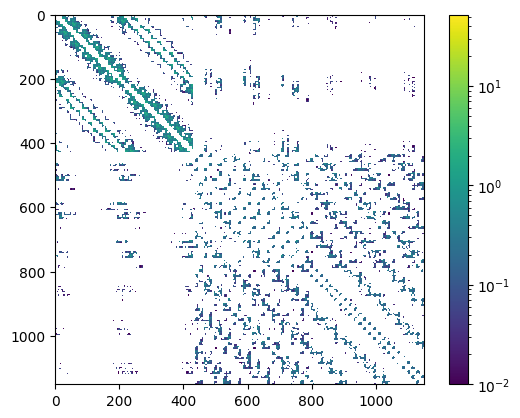

In [3]:
# Assuming H[0] is a 2D array
abs_H_active = np.abs(H[0])

# Mask values below 0.001 so they appear white
masked_data = np.ma.masked_less(abs_H_active, 0.001)

# Create the colormap
cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set masked values to white

# Plot
plt.imshow(masked_data, norm=colors.LogNorm(vmin=0.01, vmax=abs_H_active.max()), cmap=cmap)
plt.colorbar()
plt.show()


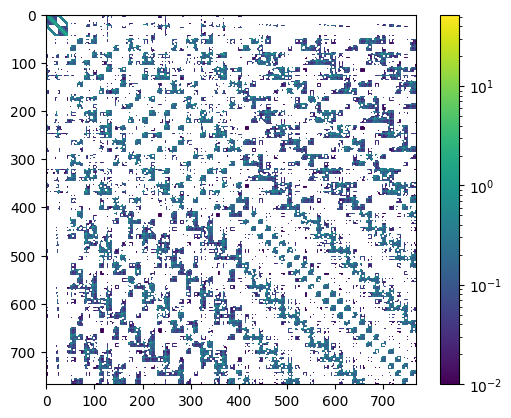

In [4]:
H = H[0]
H_active = H[np.ix_(index_active_region, index_active_region)]

# Assuming H[0] is a 2D array
abs_H_active = np.abs(H_active)

# Mask values below 0.001 so they appear white
masked_data = np.ma.masked_less(abs_H_active, 0.001)

# Create the colormap
cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set masked values to white

# Plot
plt.imshow(masked_data, norm=colors.LogNorm(vmin=0.01, vmax=abs_H_active.max()), cmap=cmap)
plt.colorbar()
plt.show()


In [32]:
C_block = abs_H_active[0:48,0:48]
Pt_block = abs_H_active[48:,48:]

# Extract coupling block: C rows, Pt columns
coupling_block = abs_H_active[0:48, 48:]

# Flatten the block to 1D
flattened = coupling_block.flatten()

# Get indices of top n values
n = 30
top_indices_flat = np.argpartition(flattened, -n)[-n:]
top_indices_flat = top_indices_flat[np.argsort(flattened[top_indices_flat])[::-1]]

# Convert to 2D indices (C index, Pt index)
top_indices = np.unravel_index(top_indices_flat, coupling_block.shape)
top_values = coupling_block[top_indices]

# Display results
for val, (i_c, i_pt) in zip(top_values, zip(*top_indices)):
    print(f"Value: {val:.5e}, C index: {i_c}, Pt index: {i_pt + 48}")


Value: 1.75480e+00, C index: 24, Pt index: 249
Value: 1.74243e+00, C index: 23, Pt index: 128
Value: 1.67746e+00, C index: 1, Pt index: 249
Value: 1.51109e+00, C index: 47, Pt index: 323
Value: 1.49841e+00, C index: 47, Pt index: 369
Value: 1.45683e+00, C index: 26, Pt index: 369
Value: 1.41880e+00, C index: 0, Pt index: 83
Value: 1.41086e+00, C index: 0, Pt index: 128
Value: 1.38325e+00, C index: 2, Pt index: 129
Value: 1.31711e+00, C index: 23, Pt index: 203
Value: 1.30497e+00, C index: 24, Pt index: 255
Value: 1.27915e+00, C index: 47, Pt index: 247
Value: 1.27531e+00, C index: 24, Pt index: 248
Value: 1.25580e+00, C index: 22, Pt index: 204
Value: 1.23705e+00, C index: 23, Pt index: 135
Value: 1.20902e+00, C index: 25, Pt index: 369
Value: 1.20863e+00, C index: 24, Pt index: 323
Value: 1.18244e+00, C index: 24, Pt index: 246
Value: 1.16344e+00, C index: 23, Pt index: 201
Value: 1.14160e+00, C index: 23, Pt index: 247
Value: 1.13811e+00, C index: 23, Pt index: 129
Value: 1.12739e+00

In [22]:
np.max(abs_H_active[48:])

import numpy as np

# Assuming abs_H_active is already defined as the absolute value of H_active
# (e.g., abs_H_active = np.abs(H_active))

# Get the max value and index in the sliced array
max_val = np.max(abs_H_active[48:])
flat_index = np.argmax(abs_H_active[48:])

# Convert flat index to 3D index (k-point, row, col)
relative_index = np.unravel_index(flat_index, abs_H_active[48:].shape)
true_index = (relative_index[0] + 48, relative_index[1])

print("Max value:", max_val)
print("Index (row, col):", true_index)


Max value: 52.20337200512833
Index (row, col): (123, 123)
